# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib.cm as cm
import matplotlib.colors as mcol

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#this section of code is testing connectivity and functionality of the openweathermap api. In this test I am pulling information for Johannesburg 


#get lat and lon
city = "Johannesburg"
# url = "http://api.openweathermap.org/geo/1.0/direct?q="
# city_url = f"{url}{city}&appid={weather_api_key}"

# res = requests.get(city_url).json()
# res[0]["lat"]
# lat_lngs(lats)

url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
res = requests.get(city_url).json()
res





{'coord': {'lon': 28.0436, 'lat': -26.2023},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 68.47,
  'feels_like': 67.6,
  'temp_min': 66.96,
  'temp_max': 70.05,
  'pressure': 1020,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 1.14, 'deg': 350},
 'rain': {'1h': 0.18},
 'clouds': {'all': 49},
 'dt': 1683467472,
 'sys': {'type': 2,
  'id': 2005686,
  'country': 'ZA',
  'sunrise': 1683434068,
  'sunset': 1683473659},
 'timezone': 7200,
 'id': 993800,
 'name': 'Johannesburg',
 'cod': 200}

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | arawa
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | brookings
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | kourou
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | galle
Processing Record 13 of Set 1 | san ignacio
Processing Record 14 of Set 1 | alliance
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | kabalo
Processing Record 21 of Set 1 | ciudad lazaro cardenas
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of

Processing Record 36 of Set 4 | ola
Processing Record 37 of Set 4 | yellowknife
Processing Record 38 of Set 4 | natal
Processing Record 39 of Set 4 | taoudenni
Processing Record 40 of Set 4 | gbadolite
Processing Record 41 of Set 4 | constantia
Processing Record 42 of Set 4 | pervomayskaya
Processing Record 43 of Set 4 | sisimiut
Processing Record 44 of Set 4 | bukama
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | faya-largeau
Processing Record 47 of Set 4 | north ward
Processing Record 48 of Set 4 | newman
Processing Record 49 of Set 4 | belyy yar
Processing Record 0 of Set 5 | tolanaro
Processing Record 1 of Set 5 | dudinka
Processing Record 2 of Set 5 | ciudad bolivar
Processing Record 3 of Set 5 | beloyarskiy
Processing Record 4 of Set 5 | juan griego
Processing Record 5 of Set 5 | oituz
Processing Record 6 of Set 5 | tralee
Processing Record 7 of Set 5 | dodge city
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | selkirk
Processi

Processing Record 29 of Set 8 | shingu
Processing Record 30 of Set 8 | fisterra
Processing Record 31 of Set 8 | castillos
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | tura
Processing Record 34 of Set 8 | buala
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | verkhnyaya sinyachikha
Processing Record 37 of Set 8 | huilong
Processing Record 38 of Set 8 | yatou
Processing Record 39 of Set 8 | mangai
Processing Record 40 of Set 8 | tayga
Processing Record 41 of Set 8 | fuglafjordur
Processing Record 42 of Set 8 | dalandzadgad
Processing Record 43 of Set 8 | prince george
Processing Record 44 of Set 8 | inhambane
Processing Record 45 of Set 8 | hadibu
Processing Record 46 of Set 8 | jinghong
Processing Record 47 of Set 8 | ringkobing
Processing Record 48 of Set 8 | papao
Processing Record 49 of Set 8 | tarawa
Processing Record 0 of Set 9 | pimentel
Processing Record 1 of Set 9 | lucapa
Processing Record 2 of Set 9 | pisco
Processing

City not found. Skipping...
Processing Record 16 of Set 12 | sao miguel
City not found. Skipping...
Processing Record 17 of Set 12 | tanrake village
City not found. Skipping...
Processing Record 18 of Set 12 | new norfolk
Processing Record 19 of Set 12 | salmon arm
Processing Record 20 of Set 12 | nouadhibou
Processing Record 21 of Set 12 | emmett
Processing Record 22 of Set 12 | oban
Processing Record 23 of Set 12 | wad az zaki
Processing Record 24 of Set 12 | aizpute
Processing Record 25 of Set 12 | ketchikan
Processing Record 26 of Set 12 | amper
Processing Record 27 of Set 12 | mumford
Processing Record 28 of Set 12 | anavyssos
Processing Record 29 of Set 12 | minas de marcona
Processing Record 30 of Set 12 | suva
Processing Record 31 of Set 12 | zouerate
Processing Record 32 of Set 12 | christchurch
Processing Record 33 of Set 12 | wamba
Processing Record 34 of Set 12 | kerch
Processing Record 35 of Set 12 | verdal
Processing Record 36 of Set 12 | la gi
Processing Record 37 of Set

[{'City': 'port-aux-francais',
  'Lat': -49.35,
  'Lng': 70.2167,
  'Max Temp': 38.95,
  'Humidity': 64,
  'Cloudiness': 27,
  'Wind Speed': 31.72,
  'Country': 'TF',
  'Date': 1683467635},
 {'City': 'arawa',
  'Lat': -6.2132,
  'Lng': 155.5367,
  'Max Temp': 78.53,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 1.54,
  'Country': 'PG',
  'Date': 1683467635},
 {'City': 'saipan',
  'Lat': 15.1355,
  'Lng': 145.701,
  'Max Temp': 81.3,
  'Humidity': 100,
  'Cloudiness': 0,
  'Wind Speed': 10.36,
  'Country': 'MP',
  'Date': 1683467635},
 {'City': 'badger',
  'Lat': 64.8,
  'Lng': -147.5333,
  'Max Temp': 37.71,
  'Humidity': 84,
  'Cloudiness': 20,
  'Wind Speed': 4.61,
  'Country': 'US',
  'Date': 1683467635},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 32.23,
  'Humidity': 86,
  'Cloudiness': 53,
  'Wind Speed': 14.76,
  'Country': 'GS',
  'Date': 1683467636},
 {'City': 'brookings',
  'Lat': 44.3114,
  'Lng': -96.7984,
  'Max Temp': 52.18,
  'Humi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,38.95,64,27,31.72,TF,1683467635
1,arawa,-6.2132,155.5367,78.53,87,100,1.54,PG,1683467635
2,saipan,15.1355,145.7010,81.30,100,0,10.36,MP,1683467635
3,badger,64.8000,-147.5333,37.71,84,20,4.61,US,1683467635
4,grytviken,-54.2811,-36.5092,32.23,86,53,14.76,GS,1683467636


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.95,64,27,31.72,TF,1683467635
1,arawa,-6.2132,155.5367,78.53,87,100,1.54,PG,1683467635
2,saipan,15.1355,145.7010,81.30,100,0,10.36,MP,1683467635
3,badger,64.8000,-147.5333,37.71,84,20,4.61,US,1683467635
4,grytviken,-54.2811,-36.5092,32.23,86,53,14.76,GS,1683467636


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

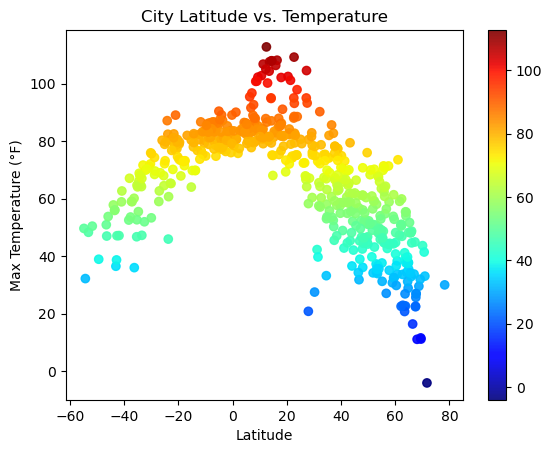

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],alpha=.9, c=city_data_df["Max Temp"],cmap='jet')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.colorbar()
# Save the figure
plt.savefig("Fig1_Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

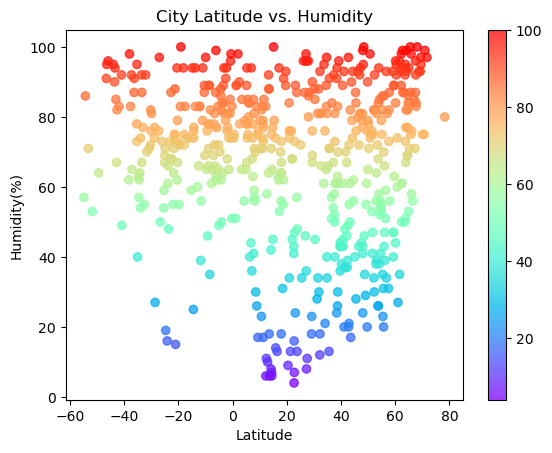

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],alpha=.75, c=city_data_df["Humidity"],cmap='rainbow')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.colorbar()
# Save the figure
plt.savefig("Fig2_Lat_Humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

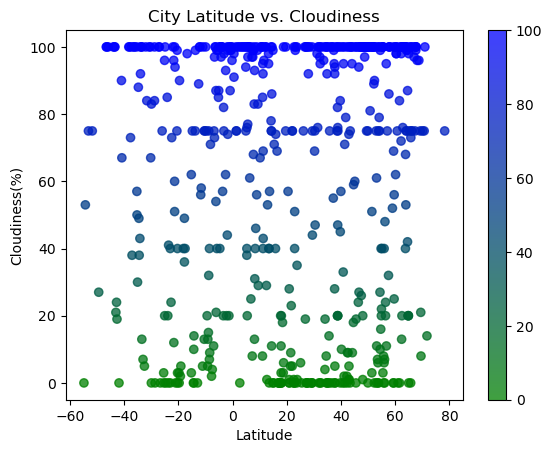

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["g","b"])
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],alpha=.75, c=city_data_df["Cloudiness"],cmap=cm1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.colorbar()

# Save the figure
plt.savefig("Fig3_Lat_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

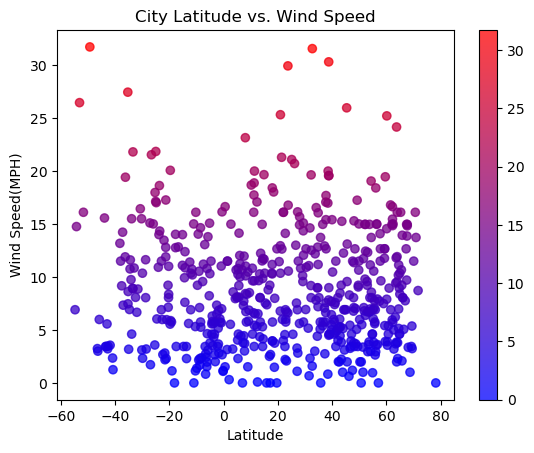

In [12]:
# Build the scatter plots for latitude vs. wind speed
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],alpha=.75, c=city_data_df["Wind Speed"],cmap=cm1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.colorbar()

# Save the figure
plt.savefig("Fig4_Lat_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# slope, intercept, r, p, std_err = stats.linregress(x, y)
# def myfunc(x):
#   return slope * x + intercept


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saipan,15.1355,145.7010,81.30,100,0,10.36,MP,1683467635
3,badger,64.8000,-147.5333,37.71,84,20,4.61,US,1683467635
5,brookings,44.3114,-96.7984,52.18,93,100,6.91,US,1683467066
6,wailua homesteads,22.0669,-159.3780,74.19,68,75,16.11,US,1683467636
8,kourou,5.1552,-52.6478,82.45,89,100,4.05,GF,1683467636
...,...,...,...,...,...,...,...,...,...
560,tahe,52.3333,124.7333,43.18,92,90,12.44,CN,1683467849
562,baltiysk,54.6538,19.9110,52.93,54,16,8.05,RU,1683467850
563,wotho,10.1657,166.0102,81.54,79,67,18.68,MH,1683467850


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.95,64,27,31.72,TF,1683467635
1,arawa,-6.2132,155.5367,78.53,87,100,1.54,PG,1683467635
4,grytviken,-54.2811,-36.5092,32.23,86,53,14.76,GS,1683467636
7,avarua,-21.2078,-159.7750,77.05,88,94,2.30,CK,1683467636
15,ta`u,-14.2336,-169.5144,81.99,74,14,10.87,AS,1683467637
...,...,...,...,...,...,...,...,...,...
547,minas de marcona,-15.2119,-75.1103,64.02,74,62,11.10,PE,1683467847
548,suva,-18.1416,178.4415,72.88,94,40,0.00,FJ,1683467847
550,christchurch,-43.5333,172.6333,55.90,90,100,3.44,NZ,1683467848


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 20, 'Y = -0.883x+96.701')

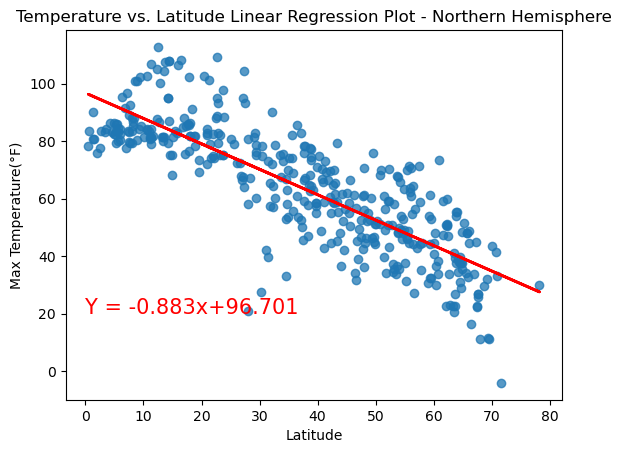

In [16]:
# Linear regression on Northern Hemisphere
#Regular scatter plot below
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Temperature vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Max Temperature(°F)")
plt.xlabel("Latitude")
plt.text(0, 20, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 15, color = "r")

Text(-14, 45, 'Y = 0.742x+87.25')

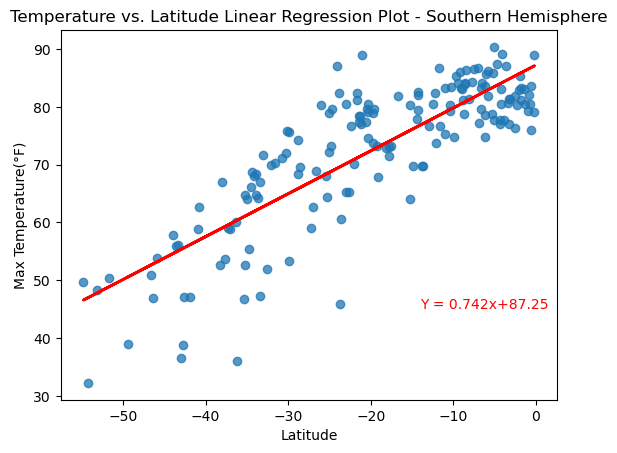

In [17]:
# Linear regression on Southern Hemisphere
#Regular scatter plot below
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Temperature vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.ylabel("Max Temperature(°F)")
plt.xlabel("Latitude")
plt.text(-14, 45, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [18]:
#calculating correlation for discussion: north = -0.828188. south = 0.837060
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between temperature and latitude for the northern and southern hemispheres. From the graphes we can tell that latitude and temperature have a negative correlation for the northern hemisphere and a positive correlation in the southern hemisphere. Both the north (-.8282) and the south (.8371) represent a strong linear relationship between the two variables.

### Humidity vs. Latitude Linear Regression Plot

Text(40, 10, 'Y = 0.185x+57.52')

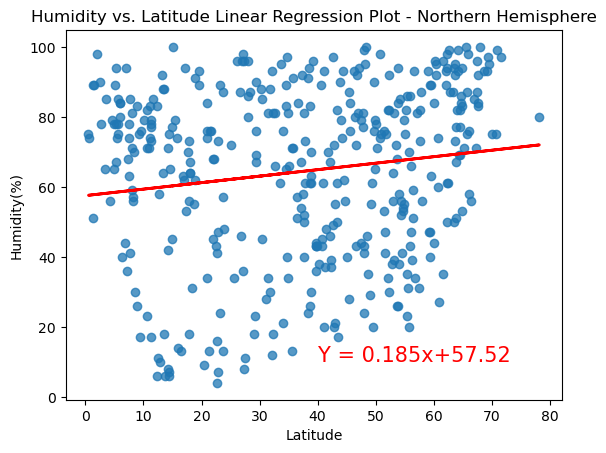

In [19]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.text(40, 10, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 15, color = "r")

Text(-55, 40, 'Y = 0.028x+73.892')

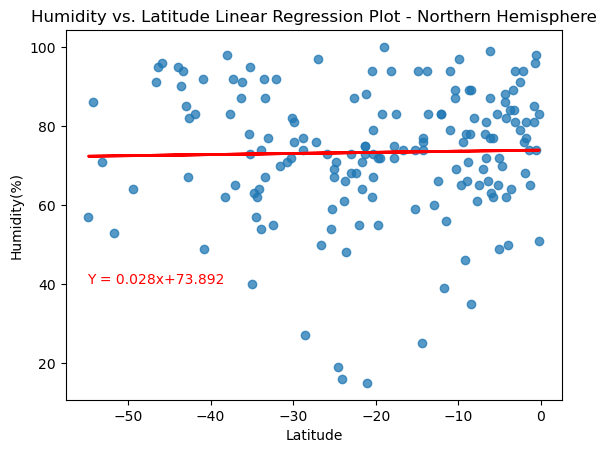

In [20]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Humidity vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.text(-55, 40, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [21]:
#calculating correlation for discussion: north = .17. south = -0.052605
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between humidity and latitude for the northern and southern hemispheres. We found that the humidity/latitude correlation for the northern hemisphere is .17 and the southern hemisphere is -0.052605. This means that neither representants a strong linear relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

Text(85, 50, 'Y = 0.099x+56.602')

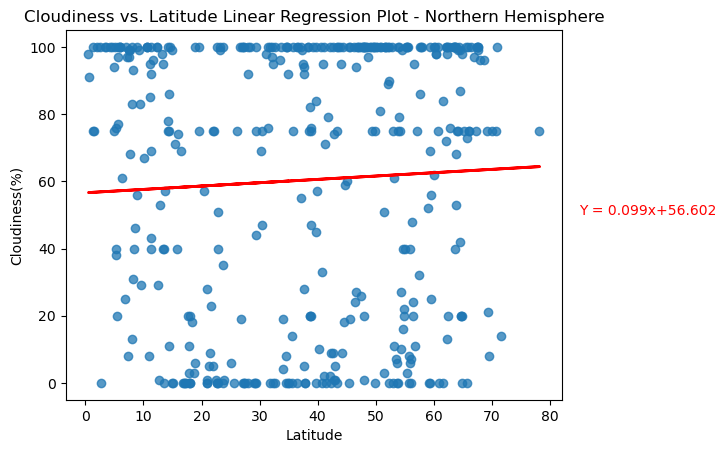

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Cloudiness vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.text(85, 50, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

Text(5, 50, 'Y = 0.131x+62.409')

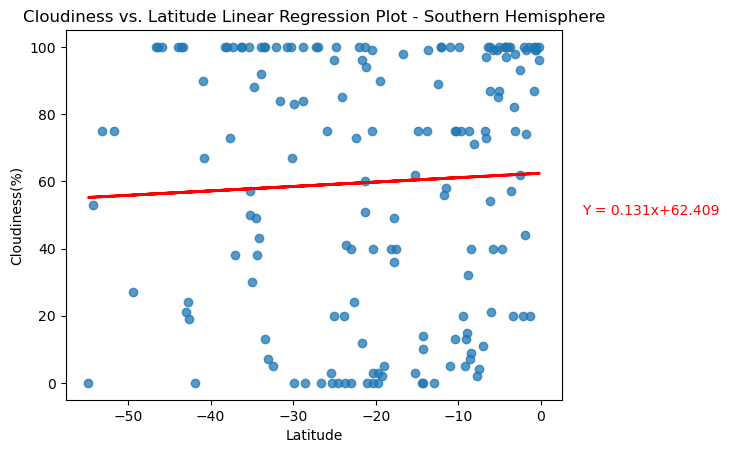

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Cloudiness vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.text(5, 50, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [24]:
#calculating correlation for discussion: north = 0.126650. south = -0.052024
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between humidity and latitude for the northern and southern hemispheres. I found the Cloudiness/latitude correlation for the northern hemisphere is 0.126650 and the southern hemisphere is -0.052024. This means that neither representants a strong linear relationship between humidity and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

Text(50, 27, 'Y = -0.006x+8.998')

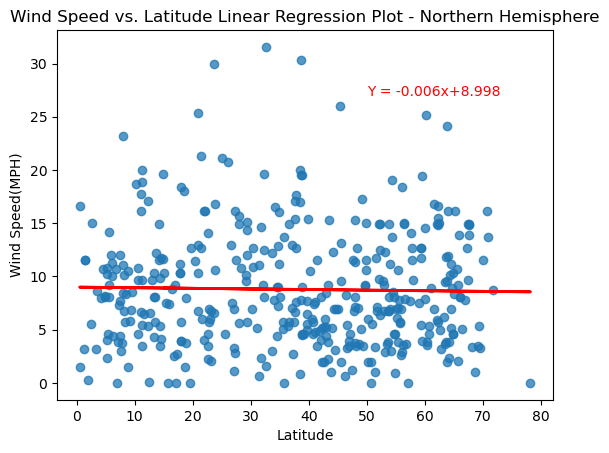

In [25]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(northern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(northern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Wind Speed vs. Latitude Linear Regression Plot - Northern Hemisphere")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.text(50, 27, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

Text(-25, 27, 'Y = -0.124x+6.048')

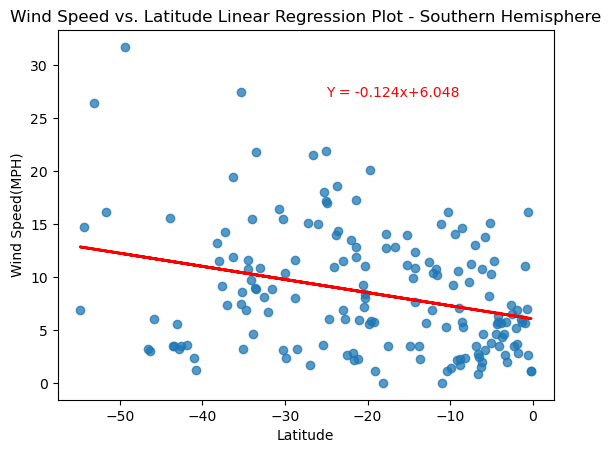

In [26]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],alpha=.75)
#using my function to calculate slope, intercept, r, p, std_err and my linear regression line
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
def myfunc(x):
  return slope * x + intercept
line = myfunc(southern_hemi_df["Lat"])
#plotting linear regression line
plt.plot(southern_hemi_df["Lat"],line,color = "red", linewidth=2 )
#formatting to make more readable
plt.title("Wind Speed vs. Latitude Linear Regression Plot - Southern Hemisphere")
plt.ylabel("Wind Speed(MPH)")
plt.xlabel("Latitude")
plt.text(-25, 27, f'Y = {round(slope,3)}x+{round(intercept,3)}', fontsize = 10, color = "r")

In [27]:
#calculating correlation for discussion: north = -0.151855. south = -0.135789
# northern_hemi_df.corr()
# southern_hemi_df.corr()

**Discussion about the linear relationship:** This linear regression is modeling the connection between Wind Speed and latitude for the northern and southern hemispheres. I found the Wind Speed/latitude correlation for the northern hemisphere is -0.151855 and the southern hemisphere is -0.135789. This means that neither representants a strong linear relationship between humidity and latitude. It might be worth noting that both the northern and southern hemispheres have a negative correlation. 